/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_63148/2631034968.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval = interval, period = PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,gain,loss,avg_gain,avg_loss,RSI
7770,446.685638,447.338742,444.794511,445.398887,66995400,3.382568,-0.000000,0.968539,0.450498,68.253234
7771,448.606018,449.142150,445.691326,445.935028,83194400,1.920380,-0.000000,1.105709,0.450498,71.051515
7772,450.350922,450.526409,447.894420,448.108878,65002200,1.744904,-0.000000,0.988728,0.450498,68.698580
7773,452.407745,452.505232,448.995922,449.999972,68327600,2.056824,-0.000000,1.135644,0.381561,74.851046
7774,458.646545,458.900005,452.427274,452.787948,93278000,6.238800,-0.000000,1.459420,0.381561,79.274031
...,...,...,...,...,...,...,...,...,...,...
8252,681.440002,682.179993,675.030029,677.239990,75842900,10.470032,-0.000000,2.612148,1.887146,58.056839
8253,683.000000,683.570007,678.729980,679.950012,58953400,1.559998,-0.000000,2.723576,1.637861,62.446759
8254,683.380005,684.960022,680.950012,684.789978,62312500,0.380005,-0.000000,2.467861,1.637861,60.107841
8255,672.039978,680.859985,670.520020,680.500000,103457800,0.000000,11.340027,2.075718,2.447863,45.886617


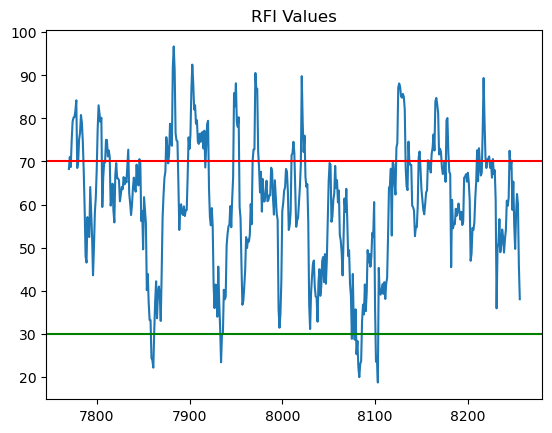

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Step 1: Ticker
TICKER = "SPY"

# Step 2: Price Behavior 
INTERVAL = "1d"
if INTERVAL == "1h":
    PERIOD = "720d"
else:
    PERIOD = "max"

# Step 3: RSI & MFI
LENGTH = 14
OVERBROUGHT = 70
OVERSOLD = 30

# Step 4: Data Subsection
LOOKBACK = 500

def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):

    # Step 1: download data 
    df = yf.download(ticker, interval = interval, period = PERIOD)

    # Step 2: Select Level 0 from Multilevel Column
    df.columns = df.columns.get_level_values(0)

    # Step 3: Simplifying df-Index for plots
    df = df.reset_index(drop=True)

    # Step 4: Return Subsect Data 
    return df.iloc[-lookback:,:]
        # -lookback: all loockback rows
        # : all columns 

def add_RSI(df, length = LENGTH):

    # Step 1: Define Delta (Price Changes between the Rows)
    price_change = df["Close"].diff()

    # Step 2: Group Price Changes based on Positive/Negative Returns
    df["gain"] = price_change.where(price_change > 0, 0)
    df["loss"] = - price_change.where(price_change < 0, 0)
        # -: we need postive numbers for the "loss" Columns, otherwise the Relative Strength 
        # will always be negative

    # Step 3: Calculate the Rolling Average for length Days
    df["avg_gain"] = df["gain"].rolling(window = length).mean()
    df["avg_loss"] = df["loss"].rolling(window = length).mean()

    # Step 4: Calculate the Relative Strength
    rs = df["avg_gain"] / df["avg_loss"]
        # In percentage Terms: how much stronger have the Up Days been compared to the Down Days
        # rs = 3: avg_gain was 3x larger than the average loss --> Strong Upward Momentum
        # rs = 0.5: avg_gain was half the size of the average loss --> Strong Downward Momentum

    # Step 5: Calculate the RSI w/ Standardization (Values between 0-100)
    df["RSI"] = 100 - (100/(1+rs))

    # Step 6: Plot the RSI 
    plt.figure()
    plt.plot(df["RSI"])
    plt.title("RFI Values")

    # Stet 7: Plot horizontal lines for Overbrought/Oversold 
    plt.axhline(OVERBROUGHT, color="red") 
    plt.axhline(OVERSOLD, color="green")
        # Crossing Overbrought Line: triggers Short Signal 
        # Crossing Oversold Line: treiggers Long Signal

    return df.dropna()

def add_MFI(df, length = LENGTH):
    # Step 1:



def main():
    df = get_data()
    df = add_RSI(df)

    return df 

df = main()
df
